In [15]:
load_ext autoreload

In [17]:
# import classy module
%autoreload
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# create instance of the class "Class"
LambdaCDM_std = Class()
LambdaCDM_new = Class()
# pass input parameters
LambdaCDM_new.set({'recfast_fudge_H':1.18})
LambdaCDM_std.set({'recfast_fudge_H':1.14})
LambdaCDM_new.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
LambdaCDM_std.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# run class
LambdaCDM_new.compute()
LambdaCDM_std.compute()

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, '$(C_\\ell - C_\\ell^\\mathrm{ref})/C_\\ell^\\mathrm{ref} [\\%]$')

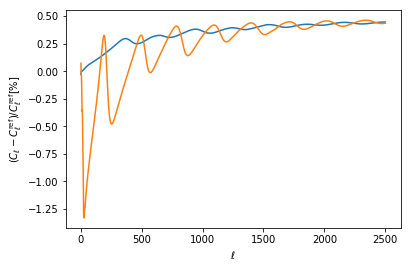

In [19]:
cls_new = LambdaCDM_new.lensed_cl(2500)
cls_std = LambdaCDM_std.lensed_cl(2500)

ll_vec_new = cls_new['ell']
ll_vec_std = cls_std['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_new, (cls_new['tt']/cls_std['tt'] - 1.)*100)
plt.plot(ll_vec_new, (cls_new['ee']/cls_std['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

In [22]:
%autoreload
LambdaCDM_newAlpha = Class()
LambdaCDM_newAlpha.set({'recombination': 'hyrec', 'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
LambdaCDM_newAlpha.compute()

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


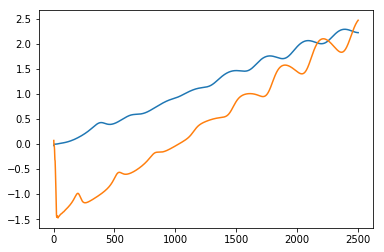

In [23]:
cls_hyrec=LambdaCDM_newAlpha.lensed_cl(2500)

ll_vec_hyrec = cls_hyrec['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_hyrec, (cls_hyrec['tt']/cls_std['tt'] - 1.)*100)
plt.plot(ll_vec_hyrec, (cls_hyrec['ee']/cls_std['ee'] - 1.)*100)